In [12]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from langdetect import detect
from transformers import AutoTokenizer

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
TAGS_PATH = Path('../data/dataset_tags.txt')
TEXTS_PATH = Path('../data/dataset_texts.txt')

### data analysis

<Axes: ylabel='Count'>

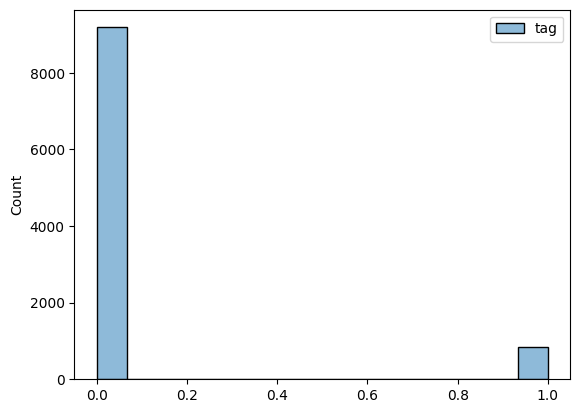

In [15]:
tags_df = pd.read_csv(TAGS_PATH, sep=" ", header=None, names=['tag'],)
sns.histplot(tags_df)


In [16]:
print(f"Total neutral observations: {sum(tags_df['tag'] == 0)}")
print(f"Total negative observations: {sum(tags_df['tag'] == 1)}")

Total neutral observations: 9190
Total negative observations: 851


In [17]:
with TEXTS_PATH.open('r', encoding='utf8') as file:
    text_data = file.readlines()
print(len(text_data), len(tags_df))


10041 10041


<Axes: ylabel='Count'>

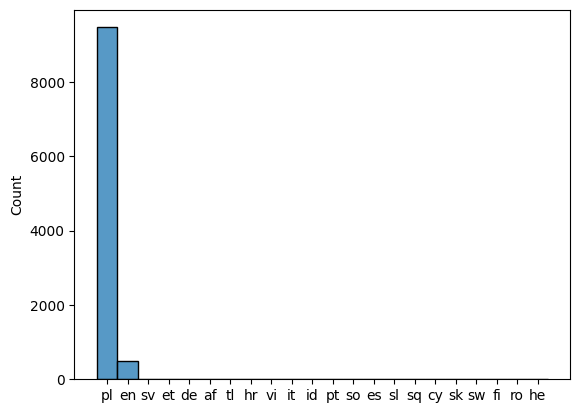

In [18]:
langs = [detect(text) for text in text_data]
sns.histplot(langs)

<Axes: ylabel='Count'>

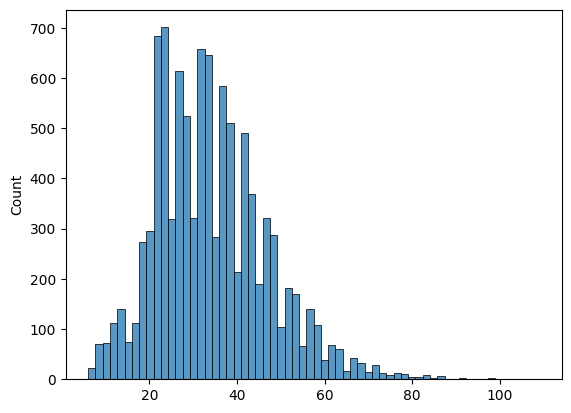

In [19]:
tokenizer = AutoTokenizer.from_pretrained("bardsai/twitter-sentiment-pl-base")
ids_length = [len(tokenizer(text)['input_ids']) for text in text_data]
sns.histplot(ids_length)